<a href="https://colab.research.google.com/github/hiiamjay/Deep-Learning/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [128]:
df = web.DataReader('LAURUSLABS.NS', data_source='yahoo', start='2012-01-01', end='2021-2-25')

In [129]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-19,99.599998,95.000000,97.980003,96.080002,87741675.0,91.272980
2016-12-20,97.889999,93.139999,96.559998,94.739998,12775220.0,90.000008
2016-12-21,96.000000,94.000000,94.800003,94.680000,4620385.0,89.943024
2016-12-22,95.580002,94.000000,94.400002,94.910004,5630110.0,90.161514
2016-12-23,95.599998,94.220001,94.989998,95.129997,2094665.0,90.370506
...,...,...,...,...,...,...
2021-02-19,373.549988,362.600006,369.000000,365.350006,1982699.0,365.350006
2021-02-22,369.000000,355.000000,367.000000,358.100006,1739504.0,358.100006
2021-02-23,364.549988,358.149994,358.500000,361.750000,1665753.0,361.750000


In [130]:
df.iloc[df.shape[0]-39:,3]

Date
2021-01-01    353.399994
2021-01-04    359.299988
2021-01-05    359.549988
2021-01-06    355.700012
2021-01-07    353.200012
2021-01-08    353.600006
2021-01-11    350.100006
2021-01-12    352.750000
2021-01-13    348.100006
2021-01-14    366.799988
2021-01-15    370.049988
2021-01-18    355.799988
2021-01-19    363.200012
2021-01-20    371.899994
2021-01-21    370.149994
2021-01-22    370.549988
2021-01-25    379.549988
2021-01-27    366.299988
2021-01-28    358.299988
2021-01-29    345.350006
2021-02-01    350.100006
2021-02-02    346.549988
2021-02-03    341.700012
2021-02-04    346.600006
2021-02-05    341.750000
2021-02-08    357.250000
2021-02-09    360.700012
2021-02-10    359.299988
2021-02-11    367.350006
2021-02-12    375.649994
2021-02-15    368.700012
2021-02-16    372.700012
2021-02-17    366.799988
2021-02-18    369.250000
2021-02-19    365.350006
2021-02-22    358.100006
2021-02-23    361.750000
2021-02-24    360.250000
2021-02-26    347.799988
Name: Close, dtype: 

In [131]:
df.shape

(1035, 6)

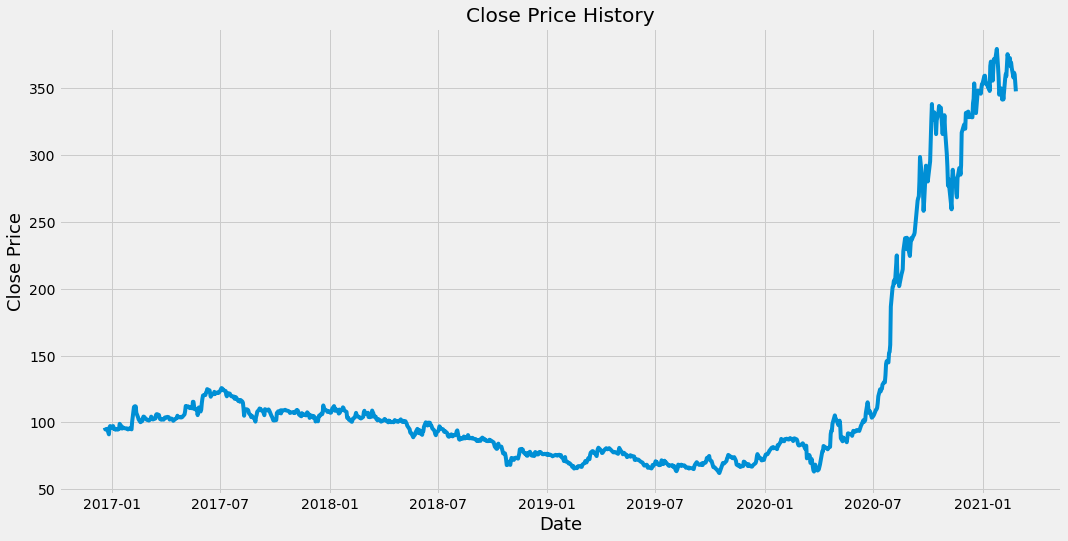

In [132]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [133]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = df.shape[0]-39

training_data_len

996

In [134]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [135]:
scaled_data

array([[0.10718111],
       [0.10296063],
       [0.10277166],
       ...,
       [0.94393704],
       [0.93921263],
       [0.9       ]])

In [136]:
train_data = scaled_data[0:training_data_len, :]
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.10718111, 0.10296063, 0.10277166, 0.10349608, 0.10418897,
       0.0913071 , 0.10771654, 0.11086615, 0.10708663, 0.10746457,
       0.11096063, 0.10462992, 0.10409449, 0.10462992, 0.10236222,
       0.1039685 , 0.10258269, 0.10381104, 0.10393702, 0.11612599,
       0.11023624, 0.10500788, 0.1057323 , 0.10746457, 0.10617324,
       0.10532283, 0.10535434, 0.10541732, 0.10286614, 0.10576378,
       0.10362204, 0.1041575 , 0.10314962, 0.12129134, 0.15546459,
       0.15722836, 0.15102363, 0.15713387, 0.14207876, 0.1311811 ,
       0.12592126, 0.12491339, 0.12188977, 0.12003151, 0.12286614,
       0.12979529, 0.13319685, 0.13288189, 0.12611023, 0.12579528,
       0.12588976, 0.12462994, 0.12387401, 0.12699214, 0.13307088,
       0.13080316, 0.12894488, 0.12648819, 0.12875591, 0.13672441])]
[0.1388031656629847]

[array([0.10718111, 0.10296063, 0.10277166, 0.10349608, 0.10418897,
       0.0913071 , 0.10771654, 0.11086615, 0.10708663, 0.10746457,
       0.11096063, 0.10462992, 0.104

In [137]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [138]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(936, 60, 1)

In [139]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [142]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

936/936 [==============================] - 25s 24ms/step - loss: 0.0059


In [143]:
test_data = scaled_data[training_data_len-60:,:]

x_test, y_test = [], dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0]) 

In [144]:
x_test = np.array(x_test)

In [145]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [146]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [147]:
rmse = np.sqrt(np.mean(prediction- y_test)**2)

In [148]:
rmse

1.9474213428986378

In [149]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction 
valid['Error Precentage'] = ((valid['Close'] - valid['Prediction'])/valid['Close'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


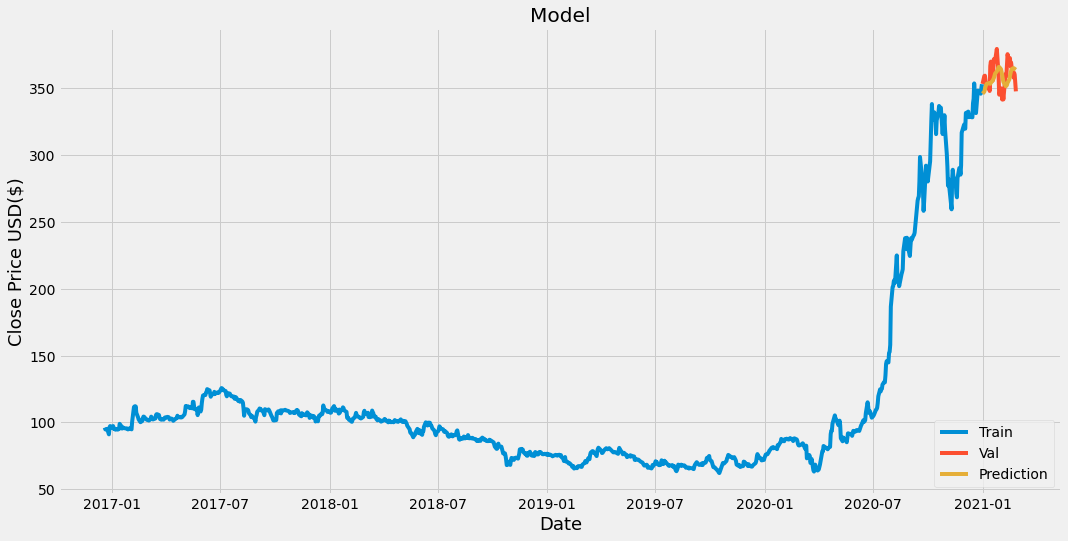

In [150]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'], loc='lower right')
plt.show()

In [151]:
valid

,Close,Prediction,Error Precentage
Date,,,
2021-01-01,353.399994,346.086731,2.069401
2021-01-04,359.299988,347.541199,3.272694
2021-01-05,359.549988,349.320160,2.845175
2021-01-06,355.700012,351.141357,1.281601
2021-01-07,353.200012,352.544250,0.185663
2021-01-08,353.600006,353.412964,0.052897
2021-01-11,350.100006,353.940765,-1.097046
2021-01-12,352.750000,353.959991,-0.343017
2021-01-13,348.100006,353.900848,-1.666430
